# **`SVM KERNEL IMPLEMENTATION`**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5.0,5.0,100)
y = np.sqrt(10**2 - x**2)
y = np.hstack([y,-y])
x = np.hstack([x,-x])

In [3]:
x1 = np.linspace(-5.0,5.0,100)
y1 = np.sqrt(5**2 - x1**2)
y1 = np.hstack([y1,-y1])
x1 = np.hstack([x1,-x1])

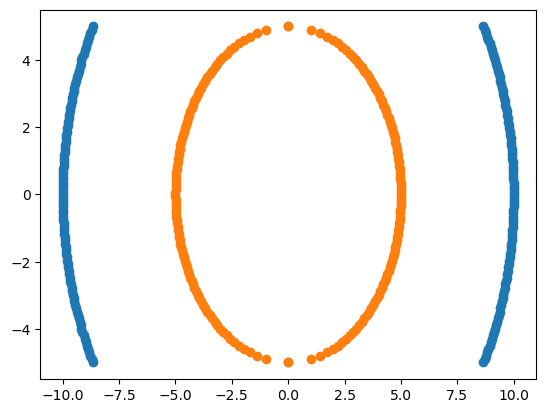

In [4]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [5]:
import pandas as pd
df1 = pd.DataFrame(np.vstack([y,x]).T,columns=["X1","X2"])
df1["Y"] = 0
df2 = pd.DataFrame(np.vstack([y1,x1]).T,columns=["X1","X2"])
df2["Y"] = 1
df = df1.append(df2)
df.head()

C:\Users\tejas\AppData\Local\Temp\ipykernel_4716\2129342152.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2)


,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [6]:
df.tail()

,X1,X2,Y
195,-1.969049,-4.59596,1
196,-1.714198,-4.69697,1
197,-1.406908,-4.79798,1
198,-0.999949,-4.89899,1
199,-0.000000,-5.00000,1


## Polynomial Kernel

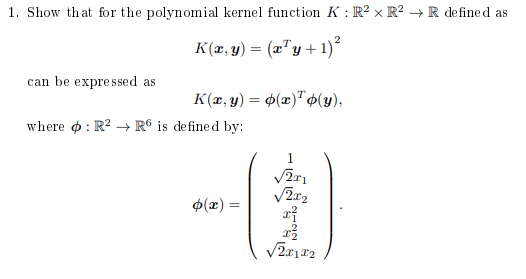

## Bases on the formual find the components for the Polynomial kernel

In [7]:
df["X1_Square"] = df["X1"]**2
df["X2_Square"] = df["X2"]**2
df["X1*X2"] = df["X1"]*df["X2"]
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [8]:
df.columns

Index(['X1', 'X2', 'Y', 'X1_Square', 'X2_Square', 'X1*X2'], dtype='object')

In [9]:
## independent and dependent features
X = df[['X1_Square', 'X2_Square', 'X1*X2']]
y = df["Y"]

In [10]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [11]:
X_train.head()

,X1_Square,X2_Square,X1*X2
50,24.997449,0.002551,0.252512
63,98.140496,1.859504,13.508984
112,10.651974,14.348026,-12.362637
159,99.079176,0.920824,9.551676
83,13.549638,11.450362,12.455852


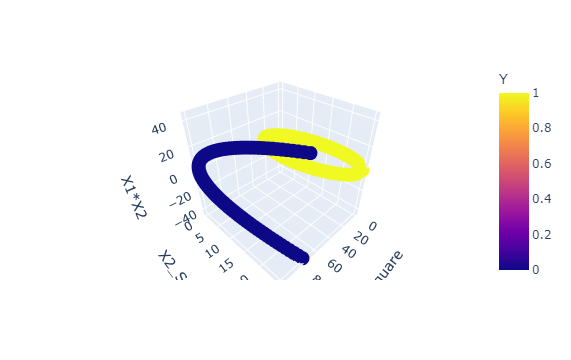

In [13]:
import plotly.express as px
fig = px.scatter_3d(df, x = "X1_Square" ,y="X2_Square",z="X1*X2" ,color="Y")
fig.show()

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [16]:
classifier = SVC(kernel="linear")
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test,y_pred))

1.0


## Radial Basis Function Kernel

<img src="https://i.stack.imgur.com/qgV9a.png">

In [19]:
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [20]:
##dependent features
X = df.iloc[:,0:2]
y = df.Y

In [22]:
X.head()

,X1,X2
0,8.660254,-5.00000
1,8.717792,-4.89899
2,8.773790,-4.79798
3,8.828277,-4.69697
4,8.881281,-4.59596


In [24]:
y

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: Y, Length: 400, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [25]:
classifier = SVC(kernel="rbf")
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test,y_pred))

1.0


## Sigmoid Kernel

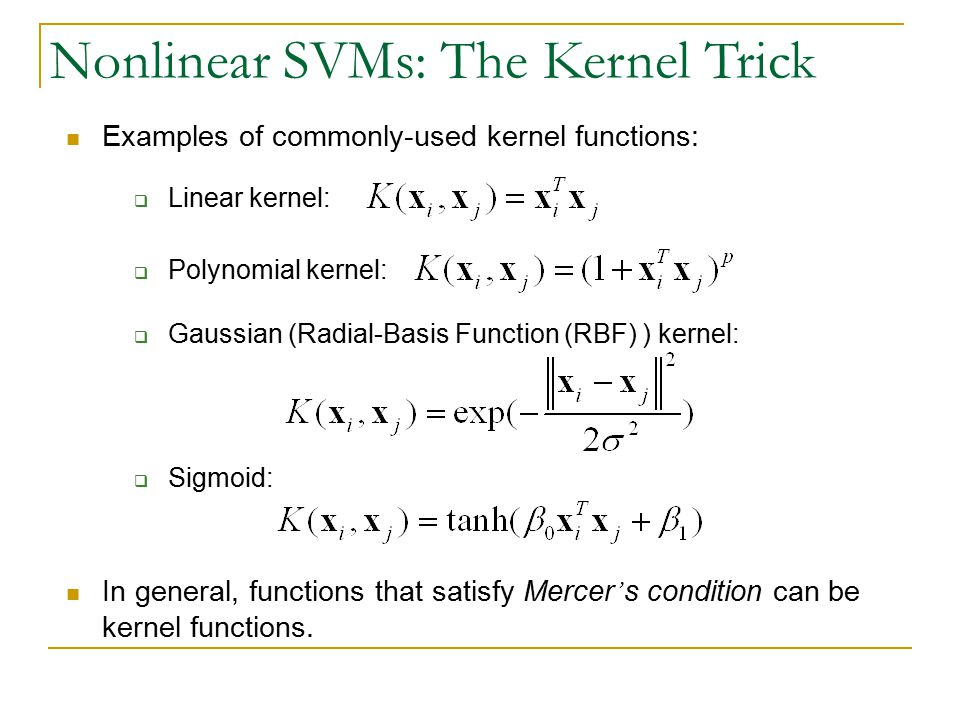

In [26]:
classifier = SVC(kernel="sigmoid")
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.51


## Data is not suitable for sigmoid